In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

reg = Lasso()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Linear Regression')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))

Linear Regression
RMSE:  126533.04685647441
MAE:  88164.84482096418


In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=150, learning_rate=0.05, colsample_bytree  = 1.0, n_jobs=4)
xgb.fit(x_train, y_train, verbose=False)

y_pred = xgb.predict(x_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))


NameError: name 'xgboost' is not defined

In [ ]:
#print feature importances graphicaly for xgboost
from xgboost import plot_importance
from matplotlib import pyplot as plt
#shorten the column names on the plot if too long
xgb.get_booster().feature_names = [i[:20] for i in xgb.get_booster().feature_names]
#make the plot bigger
plt.rcParams["figure.figsize"] = (14,16)
plot_importance(xgb)
plt.show()

NameError: name 'xgb' is not defined

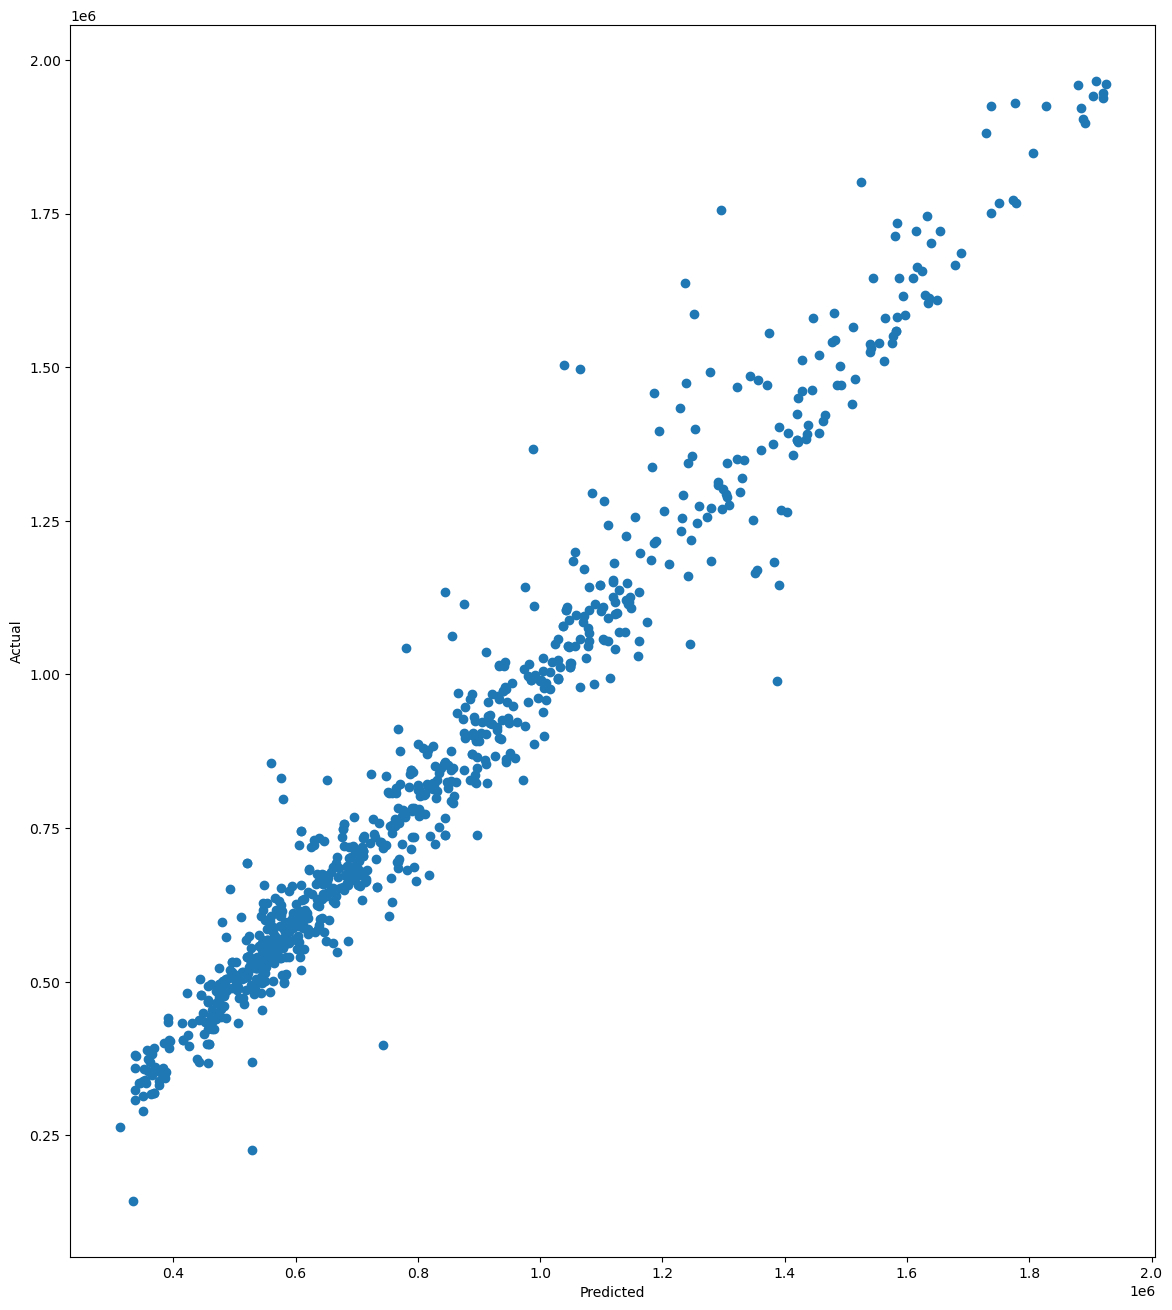

In [ ]:
#plot predictions vs actual in regular scale, not log scale
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#show the rows for the houses with the highest error
predictions_dollars = np.exp(y_pred)
y_test_dollars = np.exp(y_test)
error = predictions_dollars - y_test_dollars
error_df = pd.DataFrame({'error': error, 'actual': y_test_dollars, 'predicted': predictions_dollars})
error_df = error_df.sort_values(by=['error'], ascending=False).head(10)

error_indices = error_df.index

/tmp/ipykernel_46802/138645722.py:2: RuntimeWarning: overflow encountered in exp
  predictions_dollars = np.exp(y_pred)
/home/shua/miniconda3/envs/lev_ml/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
